# Introduction to Pandas

# A.1 Working with data in Pandas

### A.1.1 What is a Data Frame? 
- Think of it as an excel sheet with data
- In many cases:
    - Rows are observations (e.g. people, households, countries, time)
    - Columns are variables (e.g. GDP, life expectancy)
        
### A.1.2 Why don't we just use excel if Data Frames have similar structures?
- For many reasons:
    - We can easily copy dataframes and mainpulate
    - We have access to multiple dataframes with only one line of code
    - ITERATION

### A.1.3 What are the other advantages of using R and dataframes?
- We can be lazy and use the thousands of free libraries to easily

[Noteable python libraries:](#2.-Noteable-python-libraries)
1. Manipulate data (Today's topic)
2. Viusualize our data (graphing etc.)
3. Download data directly from the internet
4. Build models (Regression, Machine learning, Neural Networks)
    
    
- You have all used libraries before, perhaps without knowing it!
    - This is done in R in two steps: 
        1. install.packages("Package name") Downloads package
        2. library(Package name) Imports package

### A.1.4 What is the best way to manipulate Data Frames?
In python: Pandas
In R: DPLYR!


# 1. Exploring data frames

## 1.1 Import libraries and functions

In [1]:
import re
import sys
import quandl
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
#Function to convert data to dataframe
def to_df(dataset):
    df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
    df['target'] = pd.Series(dataset.target)
    if "target_names" in dataset:
        df['target_cat'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)
        return df
    else:
        return df

### 1.1.1 Importing a dataset $\rightarrow$ if the file is in the same folder as this notebook
- pd.read_excel("filename.xls") 
- pd.read_csv('filename.csv')

In [3]:
pd.read_csv("Covid_TS_global.csv")

,Unnamed: 0,country,date,confirmed,deaths,recovered
0,1,Afghanistan,2020-01-22,0,0,0
1,2,Afghanistan,2020-01-23,0,0,0
2,3,Afghanistan,2020-01-24,0,0,0
3,4,Afghanistan,2020-01-25,0,0,0
4,5,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...,...
14347,14348,Zimbabwe,2020-04-04,9,1,0
14348,14349,Zimbabwe,2020-04-05,9,1,0
14349,14350,Zimbabwe,2020-04-06,10,1,0
14350,14351,Zimbabwe,2020-04-07,11,2,0


### 1.1.2 But we will use an internal dataset for today's session

In [4]:
#"titanic" is the name of the dataframe
titanic = sns.load_dataset('titanic') #Downloads the internal data from seaborn library

## 1.2 Exploring the data

### 1.2.1 Where is the data?

- Our first dataframe is now loaded into memory
- Now with pandas we can access it
- All we have to do is type the name of the dataframe

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1.3. Using pandas to explore data

In [6]:
import pandas as pd #Import the pandas library 

### 1.3.1 Show first and last observations

In [7]:
titanic.head(2) #Shows first 2 observations
titanic.tail(3) #Shows last 3 observations

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### 1.3.2 Show the basic info
- Shows all the columns in our dataframe and the type

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 1.3.3 Show summary statistics

- Mean, standard deviation, min, max, quartiles

In [9]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Noteable python libraries

## 2.1 Data visualization $\rightarrow$ Matplotlib
Other noteable libraries:
- Seaborn
- Bokeh

### 2.1.1 Bar

In [10]:
import matplotlib.pyplot as plt #import library used for plotting

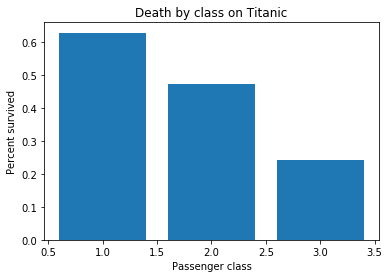

In [11]:
answer = titanic.groupby('pclass')['survived'].mean().to_frame() #Death by class
fig, ax=plt.subplots()
ax = plt.bar(answer.index, answer.survived.values)
plt.xlabel("Passenger class")
plt.ylabel('Percent survived')
plt.title('Death by class on Titanic');

### 2.1.2 Scatter/line charts

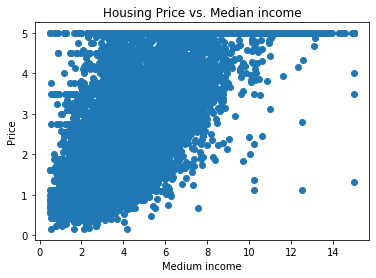

In [12]:
from sklearn.datasets import fetch_california_housing
housing = to_df(fetch_california_housing())
plt.scatter(housing.MedInc, housing.target)
plt.title("Housing Price vs. Median income")
plt.xlabel("Medium income")
plt.ylabel('Price');

## 2.2 Downloading data $\rightarrow$ Quandl
Other noteable libraries:
- Worldbank, Federal Reserve, IMF
- Stock data (Quandl, a number of other companies)
- Alternative data (geolocation)

In [ ]:
df = {}
countries = ['JP', 'US', 'FR', 'GB']
for country in countries:
    df[str(country)] = quandl.get("BIS/BS_QS%s4RUDAATO1A5J" % country)
df = pd.concat(df, axis='columns', sort=True) 
df = df/1000000
df.plot()
plt.title("Cross border claims ultimate risk basis")
plt.ylabel("Trillon USD")
plt.legend(["JP", "US", "France", "U.K."]);

## 2.3 Regression, machine learning, modeling $\rightarrow$ Sklearn

- statsmodels (Regression)
- Tensorflow, Pytorch, Keras (Neural nets)
- 

### 2.3.1 Import toy dataset for cancer prediction

In [13]:
from sklearn.datasets import load_breast_cancer
cancer_df = to_df(load_breast_cancer())
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_cat
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant


### 2.3.2 Run three seperate linear models

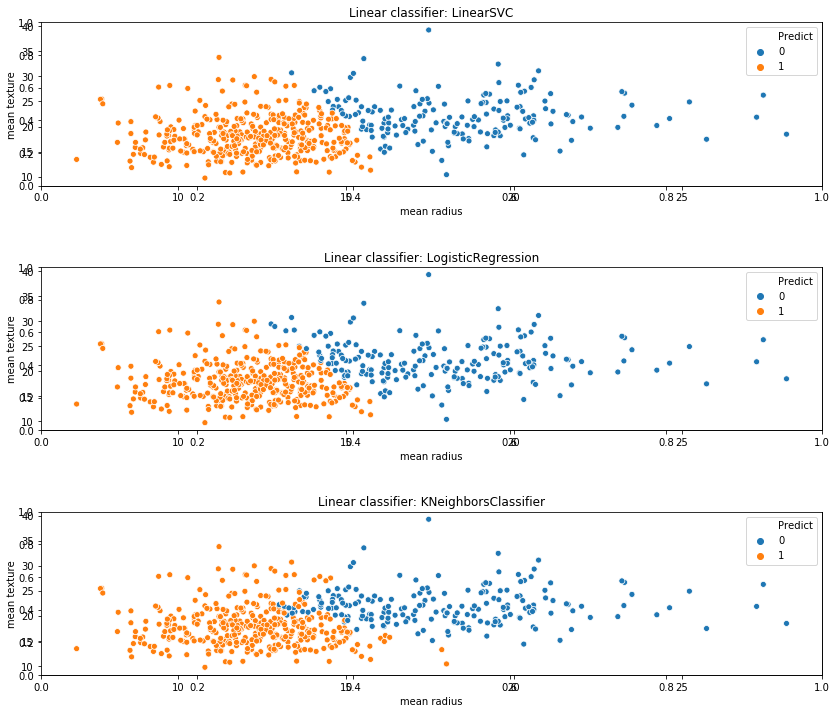

In [14]:
X_twofeatures = cancer_df[['mean radius','mean texture']]
y = cancer_df.target.values.reshape(-1,1)
def LinearClass(X,y, classifier, split=False):
    fit = eval(linear_class + "().fit(X_twofeatures, y)")
    X_twofeatures['Predict'] = fit.fit(X_twofeatures, y).predict(X_twofeatures)
    sns.scatterplot('mean radius','mean texture', data=X_twofeatures, hue='Predict')
fig, ax = plt.subplots(3, figsize=(14,12))
classifiers = ['LinearSVC', 'LogisticRegression', 'KNeighborsClassifier']
for idx, linear_class in enumerate(classifiers):
    fig.add_subplot(3, 1, idx+1)
    fig.subplots_adjust(hspace=.5)
    LinearClass(X_twofeatures, y, linear_class)
    plt.title('Linear classifier: ' + str(linear_class))

# 3. Pandas

- We will use the titanic df

## 3.1 Basics

In [15]:
df = titanic #Rename titanic dataframe
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### 2.2 Select columns
Two methods:
1. Basic method: df[["Column Name"]]
2. .loc method: df.loc[:, "Column name"] 
    - df.loc[Row, Column]

In [16]:
#We can list all the column names from a Data Frame
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### 2.2.1 Select one column
- Using loc function

In [17]:
df[['survived']].head() #Basic method
#df.loc[:, ["survived"]] #.loc method

,survived
0,0
1,1
2,1
3,1
4,0


### 2.2.2 Select multiple columns

In [18]:
df[['survived', 'age', 'fare']].head(2) #Basic method
#df.loc[:, ['survived', 'age', 'fare']].head(2) #.loc method

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833


### 2.2.3 QUESTION: Select columns and create new Data Frame

### 2.2.4 Select by column name
1. Using df.filter(regx="STRING", axis=1)

#### 2.2.4.1 Select col: starts with "surv"

In [19]:
df.filter(regex="^surv", axis=1).head(2)

,survived
0,0
1,1


#### 2.2.4.2 Select col: ends with "e"

In [20]:
df.filter(regex="e$", axis=1).head(2)

,age,fare,adult_male,alive,alone
0,22.0,7.2500,True,no,False
1,38.0,71.2833,False,yes,False


#### 2.2.4.3 Select col: contains "c"

In [21]:
df.filter(regex="c").head(2)

,pclass,parch,class,deck
0,3,0,Third,NaN
1,1,0,First,C


### 2.2.5 Select row and column

In [22]:
#Select first 4 rows and the class column
df.loc[:4, "class"]

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): [First, Second, Third]

## 2.3 Filter 
- Excel function: Contains

### 2.3.1 Filter by 1 condition

In [23]:
condition = df.pclass>1
df[condition].head(2)
#df.loc[condition,:].head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True


### 2.3.2 Filter by 2 conditions

In [24]:
condition = (df.pclass>1) &(df.who=='man')
df[condition].head(2) #Basic method
#df.loc[condition, :].head(2) #.loc method

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


### 2.3.3 Filter not aged 22

In [25]:
condition = df.age!=22
df[condition].head(2) #Basic method
#df.loc[condition,: ].head(2) #.loc method

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### 2.3.5 Filter by embarktown by any column that starts with "South"

In [26]:
condition = df.embark_town.str.contains('South', na=True)
df[condition].head(2) #Basic method
#df.loc[condition , :].head(2) #.loc method

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True


## 2.4 Arrange

### 2.4.1 Arrange by column (Ascending)

In [27]:
df.sort_values('age').head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False


### 2.4.2 Arrange  (Descending)

In [28]:
df.sort_values('age', ascending=False).head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


## 2.5 Mutate (Create new column)

### 2.5.1 Mutate

In [29]:
df["Fare_dived_10"] = df.fare/10
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fare_dived_10
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.72500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,7.12833


#### 2.5.1.1 Mutate: Various functions
1. Cumulative sum: cumsum(X)
2. Lag: lag(X)

In [30]:
df["fare_cum"] = df.fare.cumsum()
df["fare_lag"] = df.fare.shift(-1)
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Fare_dived_10,fare_cum,fare_lag
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.72500,7.2500,71.2833
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,7.12833,78.5333,7.9250


## 2.6 Summarise

In [31]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,Fare_dived_10,fare_cum,fare_lag
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,890.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,3.220421,14201.375073,32.232246
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,4.969343,8596.917096,49.714317
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,7.250000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.791040,6012.543400,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.445420,14489.124500,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.100000,20999.803600,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,51.232920,28693.949300,512.329200


## 2.7 Groupby

In [32]:
df.groupby("pclass")['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

# 3. Other important excel-like functions

## 3.1 Count

### 3.1.1 Count number of observations by gear

In [33]:
df.age.count()

714

## 3.2 Distinct

In [34]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

## 3.3 Sum

### 3.3.1 Sum column vector

In [35]:
#Sums the fare column
df['fare'].sum(axis=0)

28693.9493

### 3.3.2 Sum row vector

In [36]:
sum_df = cancer_df[['mean radius', 'mean texture', 'mean perimeter']]
sum_df['row_sum'] = sum_df.sum(axis=1)
sum_df.tail(4)

,mean radius,mean texture,mean perimeter,row_sum
565,20.13,28.25,131.20,179.58
566,16.60,28.08,108.30,152.98
567,20.60,29.33,140.10,190.03
568,7.76,24.54,47.92,80.22


### 3.3.3 Min, max

In [37]:
sum_df['mean radius'].min()
sum_df['mean radius'].max()

28.11

# Topics to cover:

- Importing excel files (.csv, .xlsx)
- Data manipulation (Create new columns, manipulate columns)
- Times series analysis 
- Machine learning basics
- Neural network basics